In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

In [4]:
df=pd.read_csv('income2.csv')
df.head()

,name,age,income
0,rob,27,70000
1,michael,29,90000
2,mohan,29,61000
3,ismail,28,60000
4,kory,42,150000


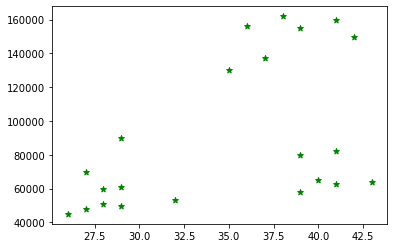

In [5]:
plt.scatter(df.age,df.income,marker='*',color='g')

In [6]:
km=KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

In [7]:
y_pred=km.fit_predict(df[['age','income']])
y_pred

array([2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0])

In [8]:
df['cluster']=y_pred

In [9]:
df

,name,age,income,cluster
0,rob,27,70000,2
1,michael,29,90000,2
2,mohan,29,61000,0
3,ismail,28,60000,0
4,kory,42,150000,1
5,gautam,39,155000,1
6,david,41,160000,1
7,andrea,38,162000,1
8,brad,36,156000,1
9,angelina,35,130000,1


No handles with labels found to put in legend.


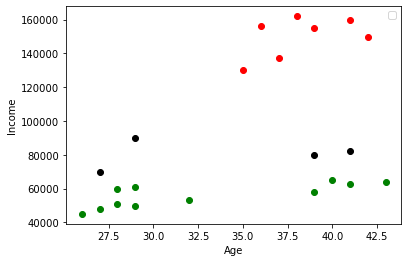

In [16]:
df0=df[df.cluster==0]
df1=df[df.cluster==1]
df2=df[df.cluster==2]

plt.scatter(df0.age,df0['income'],color='g')
plt.scatter(df1.age,df1['income'],color='r')
plt.scatter(df2.age,df2['income'],color='black')
plt.xlabel('Age')
plt.ylabel('Income')
plt.legend()

In [19]:
scaler=MinMaxScaler()
scaler.fit(df[['income']])
df['income']=scaler.transform(df[['income']])


scaler.fit(df[['age']])
df['age']=scaler.transform(df[['age']])

In [21]:
df

,name,age,income,cluster
0,rob,0.058824,0.213675,2
1,michael,0.176471,0.384615,2
2,mohan,0.176471,0.136752,0
3,ismail,0.117647,0.128205,0
4,kory,0.941176,0.897436,1
5,gautam,0.764706,0.940171,1
6,david,0.882353,0.982906,1
7,andrea,0.705882,1.000000,1
8,brad,0.588235,0.948718,1
9,angelina,0.529412,0.726496,1


In [23]:
km=KMeans(n_clusters=3)
y_pred=km.fit_predict(df[['age','income']])
y_pred

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2])

In [25]:
df['cluster']=y_pred
df

,name,age,income,cluster
0,rob,0.058824,0.213675,1
1,michael,0.176471,0.384615,1
2,mohan,0.176471,0.136752,1
3,ismail,0.117647,0.128205,1
4,kory,0.941176,0.897436,0
5,gautam,0.764706,0.940171,0
6,david,0.882353,0.982906,0
7,andrea,0.705882,1.000000,0
8,brad,0.588235,0.948718,0
9,angelina,0.529412,0.726496,0


In [27]:
km.cluster_centers_

array([[0.72268908, 0.8974359 ],
       [0.1372549 , 0.11633428],
       [0.85294118, 0.2022792 ]])

Text(0, 0.5, 'Income')

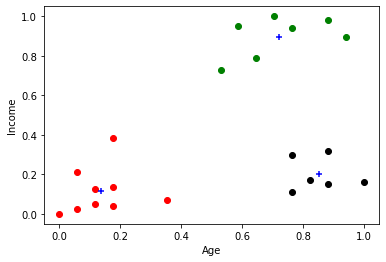

In [30]:
df0=df[df.cluster==0]
df1=df[df.cluster==1]
df2=df[df.cluster==2]

plt.scatter(df0.age,df0['income'],color='g')
plt.scatter(df1.age,df1['income'],color='r')
plt.scatter(df2.age,df2['income'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],marker='+',color='blue',label='centroid')
plt.xlabel('Age')
plt.ylabel('Income')
# plt.legend(label='Income')

In [32]:
k_range=range(1,10)
sse=[]
for k in k_range:
    km=KMeans(n_clusters=k)
    km.fit(df[['age','income']])
    sse.append(km.inertia_)

C:\Users\shris\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [33]:
sse

[5.434011511988176,
 2.0911363886990766,
 0.4750783498553095,
 0.3491047094419565,
 0.27558255687229755,
 0.22918935829650644,
 0.18427868455224797,
 0.13265419827245162,
 0.11348973978731772]

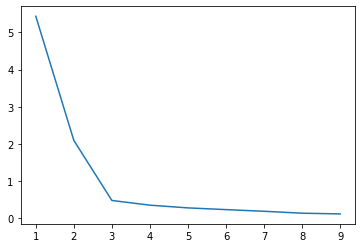

In [34]:
plt.plot(k_range,sse)